In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#scikit-learn 1.3 에서는 안됨.   
from sklearn import datasets

In [7]:
housing = datasets.load_boston() 

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [8]:
housing.keys()

NameError: name 'housing' is not defined

## Data 가공 (Iris 와 비슷한 구조임) 
* **Target** 만 처리 방법이 다름

In [ ]:
data = pd.DataFrame(housing['data'], columns=housing['feature_names'])

In [ ]:
target = pd.DataFrame(housing['target'], columns=['Target'])

In [5]:
# Data 로 저장하기 (Option)
data.to_csv("./boston_housing_data.csv", index= False)
target.to_csv("./boston_housing_target.csv", index= False)


NameError: name 'data' is not defined

In [6]:
#CSV로 읽어 오기 

data = pd.read_csv("./boston_housing_data.csv")
target = pd.read_csv("./boston_housing_target.csv")



In [9]:
print(data.shape)
print(target.shape)

(506, 13)
(506, 1)


### 데이터 에 끝에 Target을 추가 (두 데이터를 합친다)

In [10]:
df = pd.concat([data,target], axis=1)

아래 코드와 동일하다 

```
data['Target'] = target
df = data 
```

In [11]:
print(df.shape)

(506, 14)


In [12]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


# 데이터 탐색 (EDA)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Target     0
dtype: int64

In [15]:
# 중복 데이터 가 없음. 
df.duplicated().sum()

0

In [16]:
dc = df.corr()
print(dc)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [17]:
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  Target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   

In [18]:
corr_order = dc.loc[:'LSTAT', 'Target'].abs().sort_values(ascending=False)

In [19]:
print(corr_order)

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64


In [20]:
plot_cols = corr_order.iloc[0:4]

In [21]:
plot_columns = plot_cols.index.insert(0,'Target') #리스트 맨앞에 Target을 삽입후 대입 


In [22]:
plot_df = df.loc[:, plot_columns]
plot_df.head()

,Target,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18


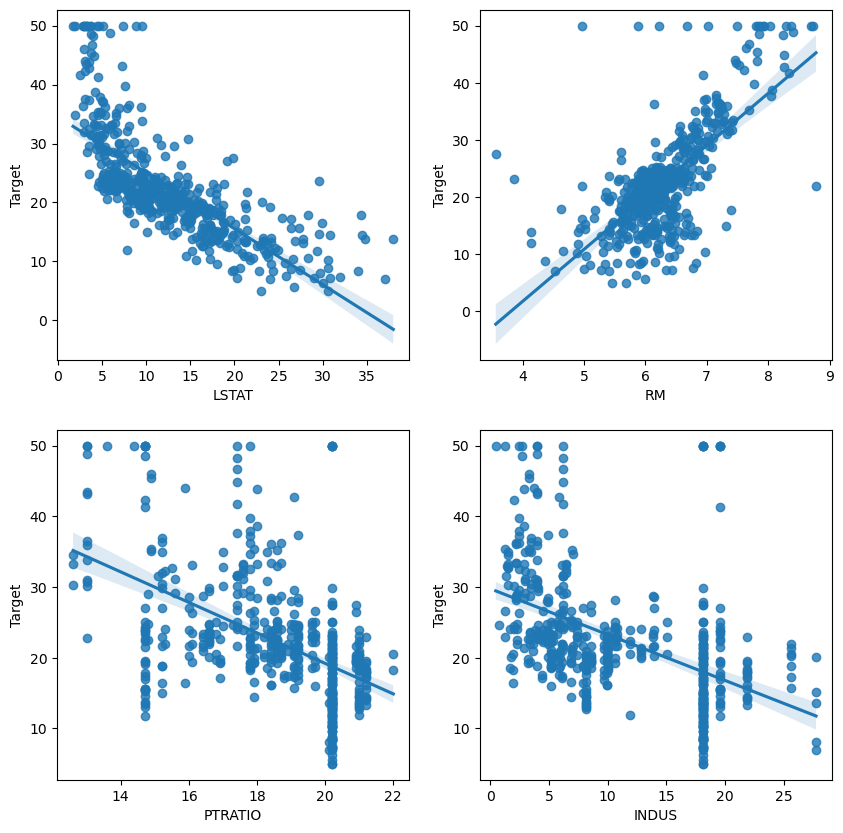

In [23]:
plt.figure(figsize=(10,10))

# Target 빼기 : plot_cols[1:]

for idx, col in enumerate(plot_columns[1:]):
    axl = plt.subplot(2,2,idx+1)
    sns.regplot(x= col, y=plot_columns[0],data= plot_df, ax = axl )
    
plt.show()
    

# 데이터 전처리 

### Featue Scaling / Normalization 




In [24]:
 # inMaxScaler 활용 정규화 작업 

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

# target을 제외한 나머지 전체 데이터 축출 : iloc 사용 , (-1) is Target column 

df_scaled = df.iloc[:, :-1]

# fit() 으로 학습 시킴 최대값 0 , 최소값 1 

scaler.fit(df_scaled) # scaler의 fit 기능을 이용하여 학습하므로서 feature sacaling을 하면서 학습한다. 
df_scalerd = scaler.transform(df_scaled)

# 스케일링된 값을 DF에 반영시킨 
# Line38 에서 생성한 df에 데이터를 반영한다. 
# Target에 넣으면 안되기 때문에 제외 시킴 

df.iloc[:, :-1] = df_scaled
df.head() 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
# 학습용 데이터셋 과 테스트 데이터셋 분리하기 

from sklearn.model_selection import train_test_split

#Feature 와 Target 분리 
X_data = df.loc[:, ['LSTAT','RM']]  # 두가지 항목만 체크 
y_data = df.loc[:, 'Target']


In [28]:
#데이터 분리하기 

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=12)

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 2) (404,)
(102, 2) (102,)


# Baseline 모델 - linear regression analysis 

In [45]:
# 선형 회귀 모형
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
print ("회귀계수(기울기): ", np.round(lr.coef_, 1))
print ("상수항(절편): ", np.round(lr.intercept_, 1))

회귀계수(기울기):  [-0.6  4.9]
상수항(절편):  0.0


In [49]:
# 예측
y_test_pred = lr.predict(X_test)

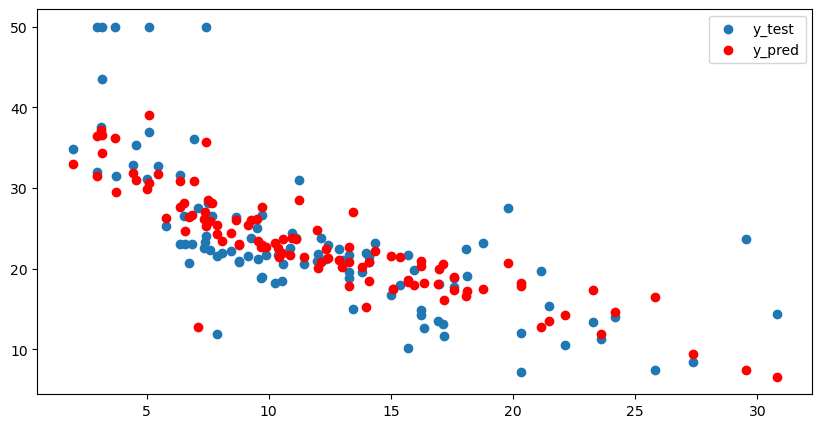

In [35]:
# 예측값, 실제값의 분포
plt.figure(figsize=(10, 5))
plt.scatter(X_test['LSTAT'], y_test, label='y_test')  
plt.scatter(X_test['LSTAT'], y_test_pred, c='r', label='y_pred')
plt.legend(loc='best')
plt.show()

In [36]:
# 평가
from sklearn.metrics import mean_squared_error
y_train_pred = lr.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 30.8042
Test MSE: 29.5065


In [37]:
# 2차 다항식 변환
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
X_train_poly = pf.fit_transform(X_train)
print("원본 학습 데이터셋: ", X_train.shape)
print("2차 다항식 변환 데이터셋: ", X_train_poly.shape)

원본 학습 데이터셋:  (404, 2)
2차 다항식 변환 데이터셋:  (404, 6)


In [38]:
# 2차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

X_test_poly = pf.fit_transform(X_test)
y_test_pred = lr.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 21.5463
Test MSE: 16.7954


In [39]:
# 15차 다항식 변환 데이터셋으로 선형 회귀 모형 학습
pf = PolynomialFeatures(degree=15)
X_train_poly = pf.fit_transform(X_train)

lr = LinearRegression()
lr.fit(X_train_poly, y_train)

# 테스트 데이터에 대한 예측 및 평가
y_train_pred = lr.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_pred)
print("Train MSE: %.4f" % train_mse)

X_test_poly = pf.fit_transform(X_test)
y_test_pred = lr.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Test MSE: %.4f" % test_mse)

Train MSE: 33.6016
Test MSE: 95.9835


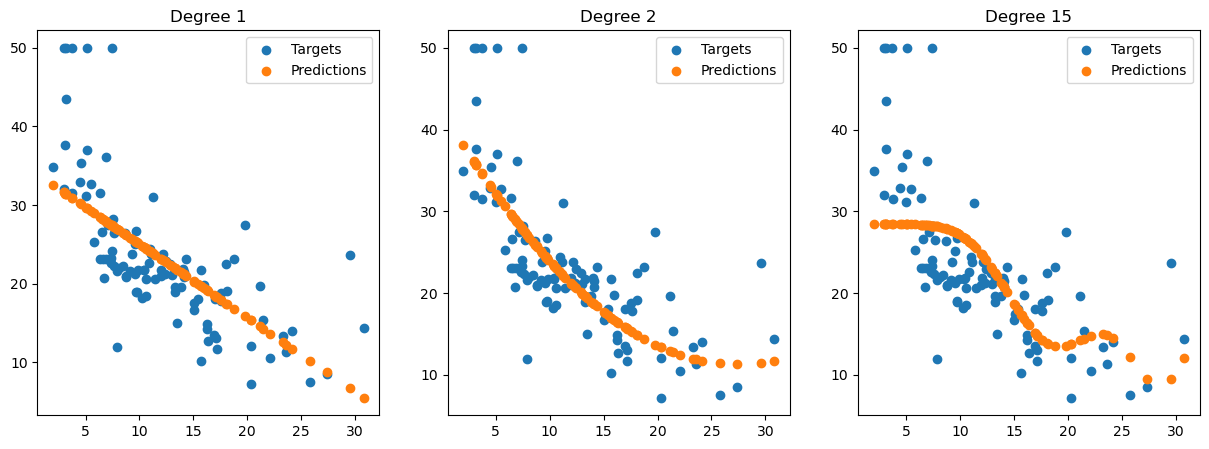

In [40]:
# 다항식 차수에 따른 모델 적합도 변화
plt.figure(figsize=(15,5))
for n, deg in enumerate([1, 2, 15]):
    ax1 = plt.subplot(1, 3, n+1)
    # degree별 다항 회귀 모형 적용
    pf = PolynomialFeatures(degree=deg)
    X_train_poly = pf.fit_transform(X_train.loc[:, ['LSTAT']])
    X_test_poly = pf.fit_transform(X_test.loc[:, ['LSTAT']])
    lr = LinearRegression()
    lr.fit(X_train_poly, y_train)
    y_test_pred = lr.predict(X_test_poly)
    # 실제값 분포
    plt.scatter(X_test.loc[:, ['LSTAT']], y_test, label='Targets') 
    # 예측값 분포
    plt.scatter(X_test.loc[:, ['LSTAT']], y_test_pred, label='Predictions') 
    # 제목 표시
    plt.title("Degree %d" % deg)
    # 범례 표시
    plt.legend()  
plt.show()